In [ ]:
import numpy as np 
import pandas as pd   
from sklearn import metrics
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import seaborn as sns; sns.set(style='ticks')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [ ]:
data = pd.read_csv('/content/airlinedelaycauses_DelayedFlights.csv')
data.shape
null_data=data
print(null_data)

         Unnamed: 0  Year  Month  ...  NASDelay  SecurityDelay  LateAircraftDelay
0                 0  2008      1  ...       NaN            NaN                NaN
1                 1  2008      1  ...       NaN            NaN                NaN
2                 2  2008      1  ...       NaN            NaN                NaN
3                 4  2008      1  ...       0.0            0.0               32.0
4                 5  2008      1  ...       NaN            NaN                NaN
...             ...   ...    ...  ...       ...            ...                ...
1936753     7009710  2008     12  ...       0.0            0.0               22.0
1936754     7009717  2008     12  ...      18.0            0.0                0.0
1936755     7009718  2008     12  ...      19.0            0.0               79.0
1936756     7009726  2008     12  ...       NaN            NaN                NaN
1936757     7009727  2008     12  ...       NaN            NaN                NaN

[1936758 rows x

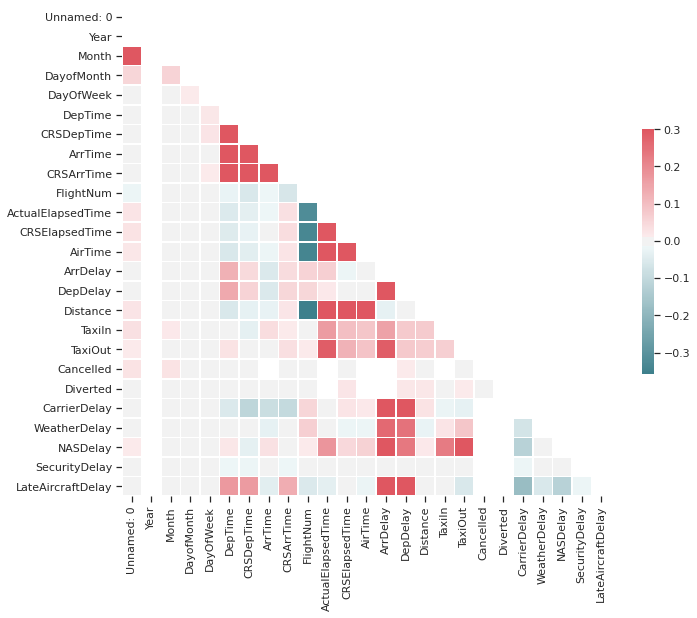

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(210, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
null_data=null_data.replace(np.nan,0)
null_data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data0 = null_data.iloc[:,:].values
data0 = data0[:,:]
y = data0[:,29]
x = data0[:,[5,6,7,8,10,12,13,14,15,16,19,20,21,25,26,27,28]]
print(y)
print(x)

[0.0 0.0 0.0 ... 79.0 0.0 0.0]
[[2003.0 1955 2211.0 ... 0.0 0.0 0.0]
 [754.0 735 1002.0 ... 0.0 0.0 0.0]
 [628.0 620 804.0 ... 0.0 0.0 0.0]
 ...
 [1007.0 847 1149.0 ... 0.0 19.0 0.0]
 [1251.0 1240 1446.0 ... 0.0 0.0 0.0]
 [1110.0 1103 1413.0 ... 0.0 0.0 0.0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(X_train)

[[650.0 640 753.0 ... 10.0 8.0 0.0]
 [944.0 935 1110.0 ... 0.0 31.0 0.0]
 [1628.0 1525 2110.0 ... 0.0 60.0 0.0]
 ...
 [2120.0 2038 2327.0 ... 0.0 0.0 0.0]
 [1526.0 1310 1725.0 ... 0.0 0.0 0.0]
 [1507.0 1430 1605.0 ... 0.0 0.0 0.0]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,9.048358
1,0,-1.760886
2,16,14.002243
3,0,-2.875684
4,0,-1.985078
...,...,...
387347,0,11.750931
387348,0,5.592719
387349,53,51.077511
387350,8,5.743937


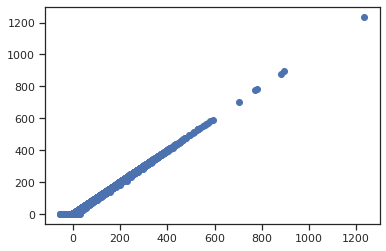

In [ ]:
plt.scatter(y_pred, y_test)

In [ ]:
metrics.r2_score(y_test, y_pred)

0.9824128540211006